E:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Lag: 14
Coefficients: [ 0.01191767  0.59260794  0.10348269 -0.01050406  0.01433917 -0.08447193
  0.11539819 -0.04461851  0.020603   -0.06315588  0.05123079  0.18845579
  0.50534943 -0.22203089 -0.16161237]
predicted=17.215692, expected=17.150000
predicted=17.211856, expected=16.680000
predicted=15.808771, expected=14.180000
predicted=15.180557, expected=14.990000
predicted=14.785573, expected=14.880000
predicted=15.001370, expected=15.120000
predicted=14.760228, expected=15.300000
predicted=14.371093, expected=15.390000
predicted=13.687823, expected=13.120000
predicted=15.082605, expected=15.460000
predicted=16.342149, expected=17.550000
predicted=17.119899, expected=17.530000
Test MSE: 0.535


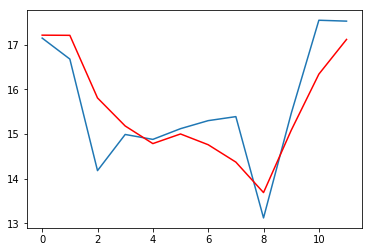

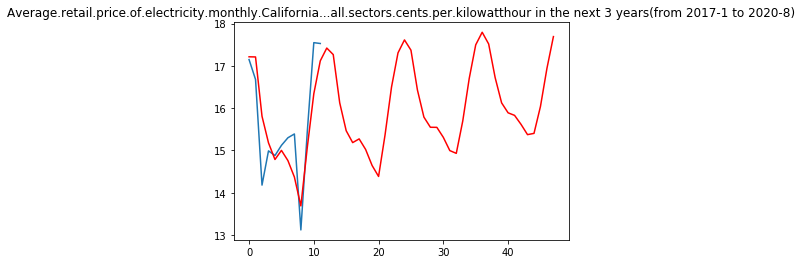

In [1]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour.csv', header=0)
# split dataset
X = series.values
train, test = X[0:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# print the predicted data (the bule one is the real data, the red one is the predicted data)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1+3*12, dynamic=False)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour in the next 3 years(from 2017-1 to 2020-8)')
pyplot.show()